# Individual Project Planning Stage

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(lubridate)
library(ggplot2)
options(repr.matrix.max.rows = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Data 

`players.csv` contains information about the users of the Minecraft server, PLAICraft. There are 196 observations and 7 variables as follows: 
- `experience` - character: player's self-determined experience level (`Beginner`, `Amateur`, `Regular`, `Veteran`, or `Pro`)
- `subscribe` - logical: player's subscription status to a game-related newsletter (`TRUE` or `FALSE`)
- `hashedEmail` - character: hashed player's email
- `played_hours` - double: total hours played by each user 
- `name` - character: player's first name
- `gender` - character: player's gender
- `Age` - double: player's age 
<br>
<br>

Self-reporting as the method of data collection may pose an issue with the accuracy of the data especially with the subjective category experience. There are also two missing values in `Age` that should be considered. 

`sessions.csv` contains information about sessions played on PLAICraft. There are 1535 observations and 5 variables as follows:
- `hashedEmail` - character: hashed player's email
- `start_time` - character: session start time in dd/mm/yyyy time 
- `end_time` - character: session end time in dd/mm/yyyy time 
- `orginal_start_time` - double: session start time in milliseconds since January 1st, 1970 at Coordinated Universal Time (UNIX time)
- `orginal_end_time` - double: session end time in milliseconds since January 1st, 1970 at Coordinated Universal Time (UNIX time)
<br>
<br>

Due to multiple observations in the same cell for the character variables `start_time` and `end_time`, the data is not tidy. 

In [2]:
#Loading Data Sets
players_url <- "https://raw.githubusercontent.com/skylv777/Data_Science_Project/refs/heads/main/data/players.csv"
sessions_url <- "https://raw.githubusercontent.com/skylv777/Data_Science_Project/refs/heads/main/data/sessions.csv"
players_data <- read_csv(players_url)
sessions_data <- read_csv(sessions_url)
head(players_data)
head(sessions_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [29]:
#Tidying sessions_data so there is only one value per cell by converting to dttm format
sessions_data_tidy <- sessions_data |>
         mutate(start_time = dmy_hm(start_time)) |>
         mutate(end_time = dmy_hm(end_time))
head(sessions_data_tidy)

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.71916e+12


#### Summary Statistics for players_data

In [4]:
#Summary Statistics on Quantitative Values of players_data 
players_data_select <- select(players_data, Age, played_hours)

players_data_stats <- 
        bind_rows(map_df(players_data_select, mean, na.rm = TRUE), 
                  map_df(players_data_select, median, na.rm = TRUE),
                  map_df(players_data_select, ~{
    x <- na.omit(.x)
    if (length(x) == 0) return(NA_real_)
    tibble(val = x) |>
      count(val, sort = TRUE) |>
      filter(n == max(n)) |>
      slice_head(n = 1) |>   
      pull(val)}),
                  map_df(players_data_select, min, na.rm = TRUE),
                  map_df(players_data_select, max, na.rm = TRUE), 
                  map_df(players_data_select, sd, na.rm = TRUE), #?seems too high
                  map_df(players_data_select, ~ quantile(.x, probs = 0.25, na.rm = TRUE)[[1]]),
                  map_df(players_data_select, ~ quantile(.x, probs = 0.5, na.rm = TRUE)[[1]]),
                  map_df(players_data_select, ~ quantile(.x, probs = 0.75, na.rm = TRUE)[[1]])) |>
        mutate(Summary = c("Mean", "Median", "Mode", "Minimum", "Maximum", "Standard Deviation", "1st Quartile", "2nd Quartile", "3rd Quartile")) |>
        relocate(Summary) |>
        mutate(across(Age:played_hours, \(x) round(x, digits = 2)))
        
players_data_stats

Summary,Age,played_hours
<chr>,<dbl>,<dbl>
Mean,21.14,5.85
Median,19.00,0.10
Mode,17.00,0.00
Minimum,9.00,0.00
Maximum,58.00,223.10
Standard Deviation,7.39,28.36
1st Quartile,17.00,0.00
2nd Quartile,19.00,0.10
3rd Quartile,22.75,0.60


In [5]:
player_gender_total <- players_data |> 
        summarize(total = n())|>
        pull()

player_gender_count <- players_data |>
        group_by(gender) |>
        summarize(count=n()) |>
        arrange(desc(count)) |>
        mutate(percent = count / player_gender_total * 100)

player_gender_stats <- player_gender_count |>
        mutate(percent = round(percent, digit = 2))

player_gender_stats

gender,count,percent
<chr>,<int>,<dbl>
Male,124,63.27
Female,37,18.88
Non-binary,15,7.65
Prefer not to say,11,5.61
Two-Spirited,6,3.06
Agender,2,1.02
Other,1,0.51


In [6]:
player_experience_total <- players_data |>
        summarize(total = n()) |>
        pull()

player_experience_count <- players_data |>
        group_by(experience) |>
        summarize(count = n()) |>
        arrange(desc(count)) |>
        mutate(percent = count / player_experience_total * 100)

player_experience_stats <- player_experience_count |>
        mutate(percent = round(percent, digits = 2))
            
player_experience_stats

experience,count,percent
<chr>,<int>,<dbl>
Amateur,63,32.14
Veteran,48,24.49
Regular,36,18.37
Beginner,35,17.86
Pro,14,7.14


In [7]:
player_subscribe_total <- players_data |> 
        summarize(total = n()) |>
        pull()

player_subscribe_count <- players_data |>
        group_by(subscribe) |>
        summarize(count = n()) |>
        arrange(desc(count))|>
        mutate(percent = count / player_subscribe_total * 100)

player_subscribe_stats <- player_subscribe_count |>
        mutate(percent = round(percent, digits = 2))

player_subscribe_stats 

subscribe,count,percent
<lgl>,<int>,<dbl>
TRUE,144,73.47
FALSE,52,26.53


#### Summary Statistics for sessions_data

In [8]:
sessions_data_difference <- sessions_data_tidy |>
        mutate(session_length = end_time - start_time) |>
        mutate(session_length = as.double(session_length))

sessions_data_select <- select(sessions_data_difference,-hashedEmail)
sessions_data_select_2 <- select(sessions_data_select, original_start_time, original_end_time, session_length)
sessions_data_stats <- 
        bind_rows(map_df(sessions_data_select, mean, na.rm = TRUE), 
                  map_df(sessions_data_select, median, na.rm = TRUE),
                  map_df(sessions_data_select, ~{
    x <- na.omit(.x)
    if (length(x) == 0) return(NA_real_)
    tibble(val = x) |>
      count(val, sort = TRUE) |>
      filter(n == max(n)) |>
      slice_head(n = 1) |>   
      pull(val)}),
                  map_df(sessions_data_select, min, na.rm = TRUE),
                  map_df(sessions_data_select, max, na.rm = TRUE), 
                  map_df(sessions_data_select_2, sd, na.rm = TRUE), 
                  tibble(start_time = quantile(pull(sessions_data_difference, as.double(start_time)), c(0.25, 0.5, 0.75), na.rm = TRUE),
                  end_time = quantile(pull(sessions_data_difference, as.double(end_time)), c(0.25, 0.5, 0.75), na.rm = TRUE), 
                  original_start_time = quantile(pull(sessions_data_difference, original_start_time), c(0.25, 0.5, 0.75), na.rm = TRUE), 
                  original_end_time = quantile(pull(sessions_data_difference, original_end_time), c(0.25, 0.5, 0.75), na.rm = TRUE),
                  session_length = quantile(pull(sessions_data_difference, session_length), c(0.25, 0.5, 0.75), na.rm = TRUE)))|>
       mutate(Summary = c("Mean", "Median", "Mode", "Minimum", "Maximum", "Standard Deviation", "1st Quartile", "2nd Quartile", "3rd Quartile")) |>
       relocate(Summary) |>
       mutate(session_length = round(session_length, digits = 2))
sessions_data_stats

Summary,start_time,end_time,original_start_time,original_end_time,session_length
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>
Mean,2024-06-24 03:54:03,2024-06-24 02:26:18,1.719201e+12,1.719196e+12,50.86
Median,2024-06-24 02:51:00,2024-06-23 22:04:00,1.719200e+12,1.719180e+12,30.00
Mode,2024-06-27 22:59:00,2024-06-27 23:04:00,1.721890e+12,1.721890e+12,5.00
Minimum,2024-04-06 09:27:00,2024-04-06 09:31:00,1.712400e+12,1.712400e+12,3.00
Maximum,2024-09-26 06:09:00,2024-09-26 07:39:00,1.727330e+12,1.727340e+12,259.00
Standard Deviation,NA,NA,3.557492e+09,3.552813e+09,55.57
1st Quartile,2024-05-20 20:28:00,2024-05-20 21:37:00,1.716240e+12,1.716240e+12,9.00
2nd Quartile,2024-06-24 02:51:00,2024-06-23 22:04:00,1.719200e+12,1.719180e+12,30.00
3rd Quartile,2024-07-25 06:56:00,2024-07-25 07:00:00,1.721890e+12,1.721890e+12,73.00


### Visualizations

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


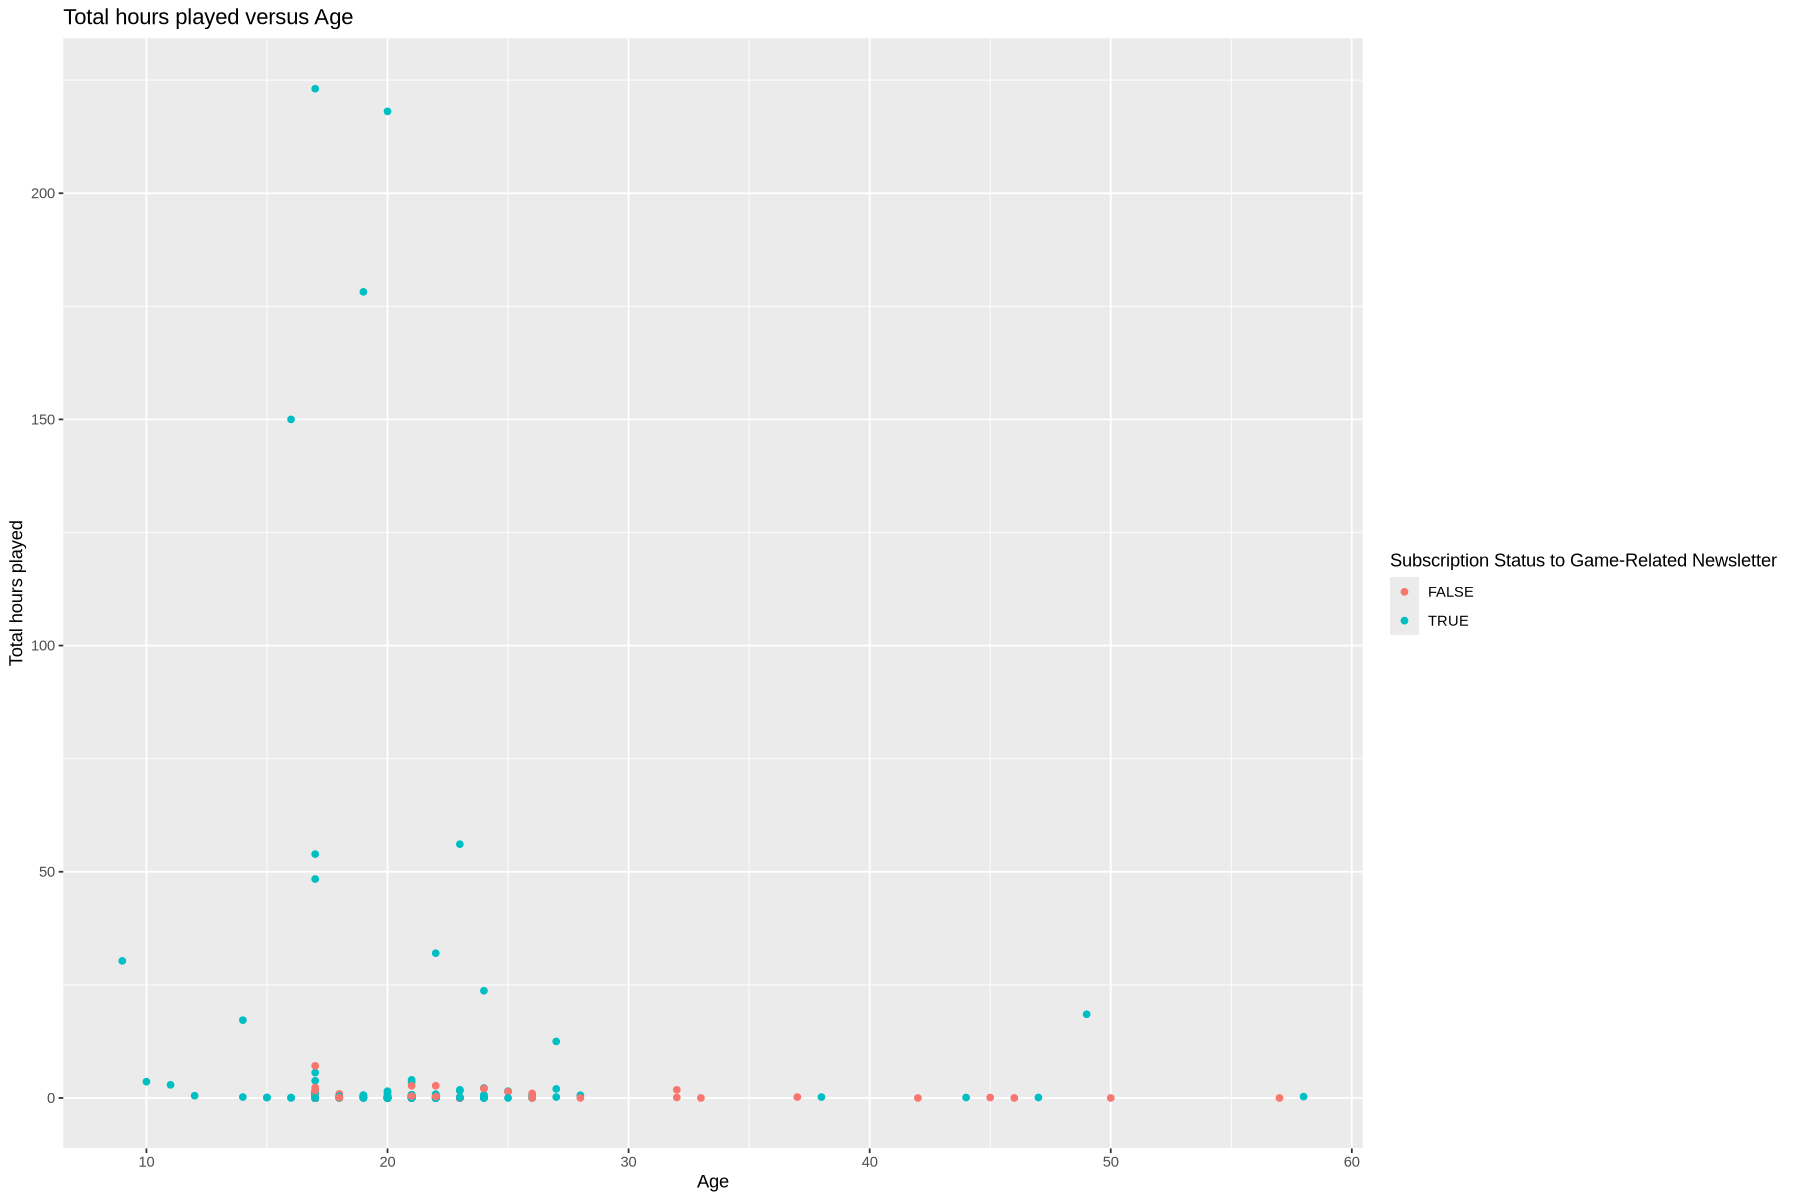

In [15]:
options(repr.plot.height = 10, repr.plot.width = 15)
hours_age_subscribe_plot <- players_data |>
        ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
        geom_point() +
        labs (x = "Age",
              y = "Total hours played",
              colour = "Subscription Status to Game-Related Newsletter") +
        ggtitle("Total hours played versus Age")
hours_age_subscribe_plot      

It appears that most players are under 30 and have total hours played under 10 hours especially over 30. Additionally, all the players who played more than 20 hours total were subscribed to a newsletter and similarly it appears that the users over 30 are considerably less likely to be subscribed to a newsletter. 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


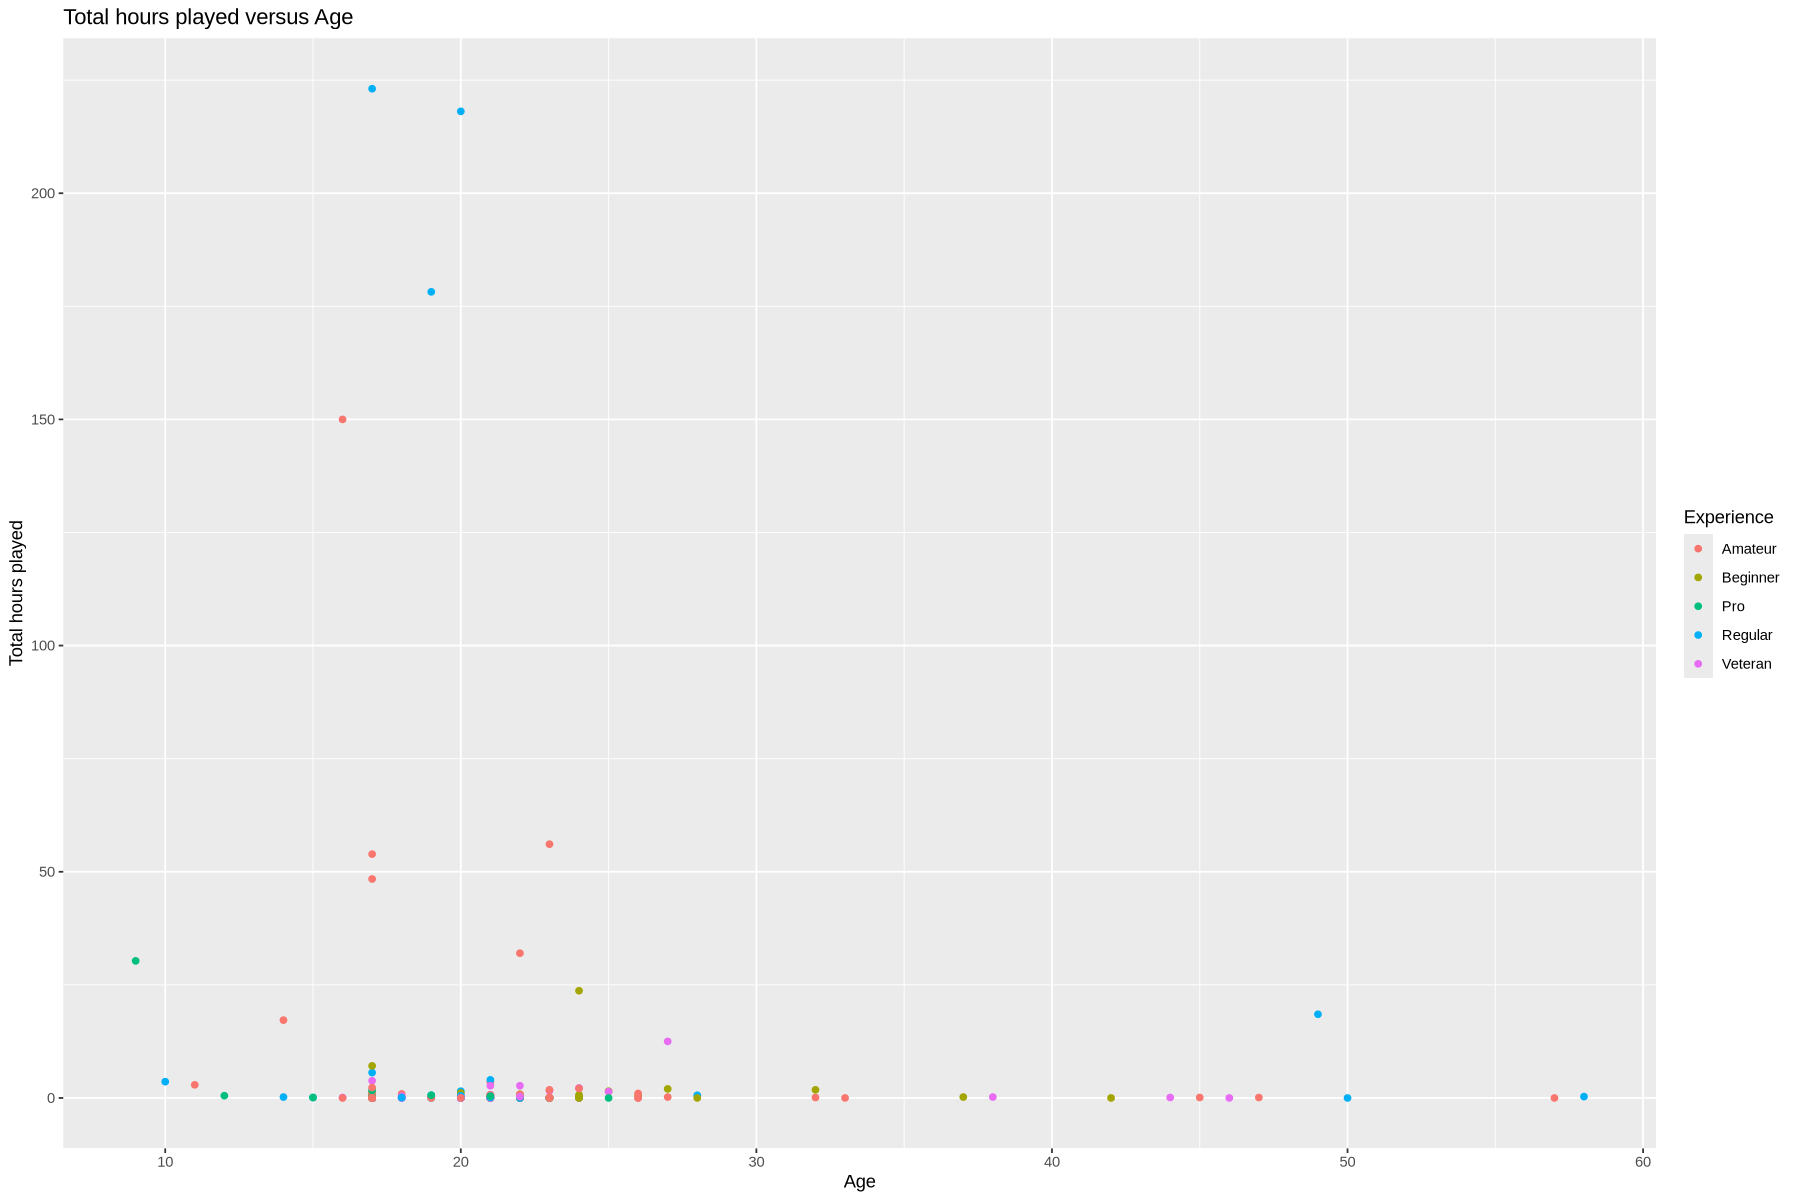

In [10]:
options(repr.plot.height = 10, repr.plot.width = 15)
hours_age_experience_plot <- players_data |>
        ggplot(aes(x = Age, y = played_hours, colour = experience)) +
        geom_point() +
        labs (x = "Age",
              y = "Total hours played",
              colour = "Experience") +
        ggtitle("Total hours played versus Age")
hours_age_experience_plot      

No clear relationship between age and total hours played or experience. However, all the users with over approximately 50 total hours played are either amateur or regular. 

Adding missing grouping variables: `hashedEmail`
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


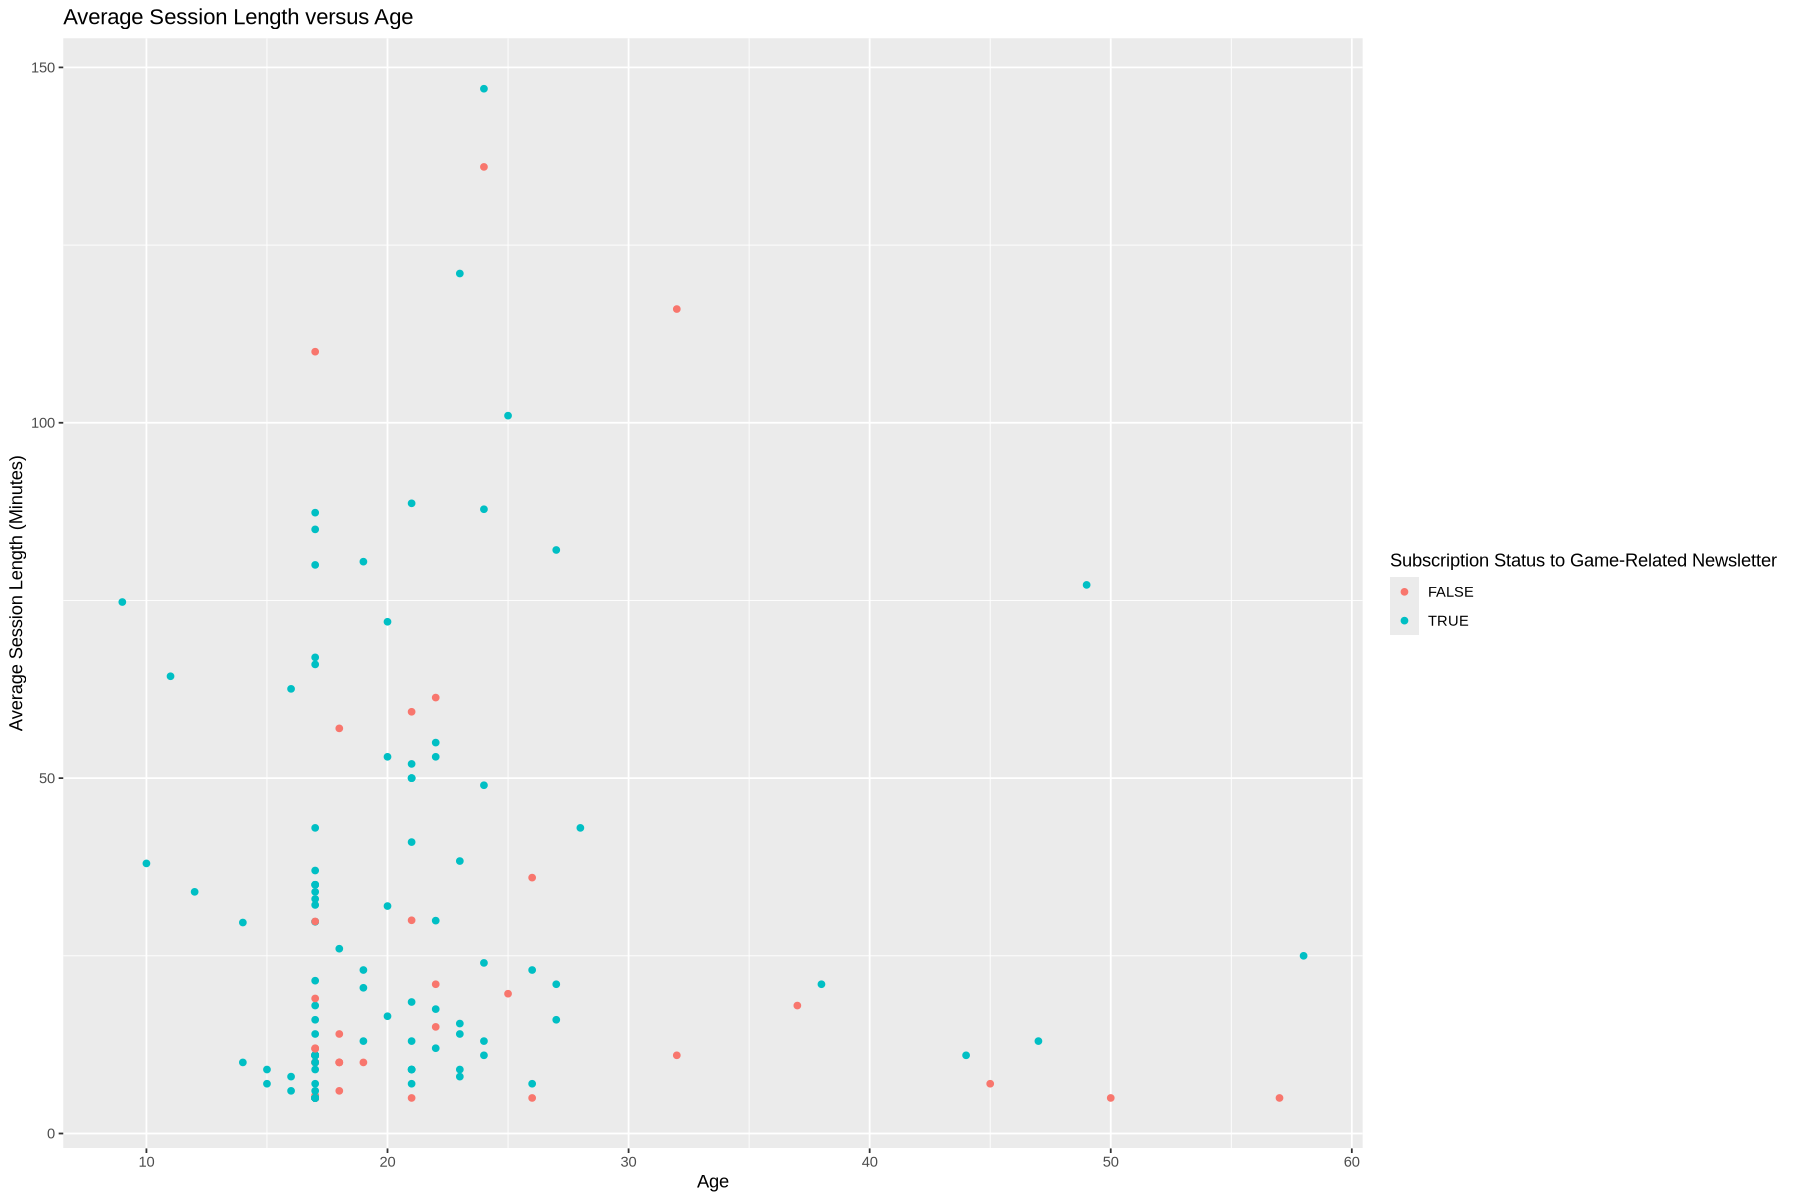

In [11]:
options(repr.plot.height = 10, repr.plot.width = 15)
# Determining average session length per player
average_sessions_data <- sessions_data_tidy |>
         mutate(session_length = end_time - start_time) |>
         mutate(session_length = as.double(session_length)) |>
         group_by(hashedEmail) |>
         select(session_length) |>
         summarize(average_session_length = mean(session_length))

# Combining Data Sets
combined_data <- merge(players_data, average_sessions_data)

average_age_plot <- combined_data |>
        ggplot(aes(x = Age, y = average_session_length, colour = subscribe)) +
        geom_point() +
        labs (x = "Age",
              y = "Average Session Length (Minutes)",
              colour = "Subscription Status to Game-Related Newsletter") +
        ggtitle("Average Session Length versus Age")
average_age_plot  

It appears that the ratio between users subscribed to users not subscribed to a newsletter seems higher with players with average session length above 25 minutes. Additionally, users above the age of 30 appear more likely to have average session length below 25 minutes. 

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


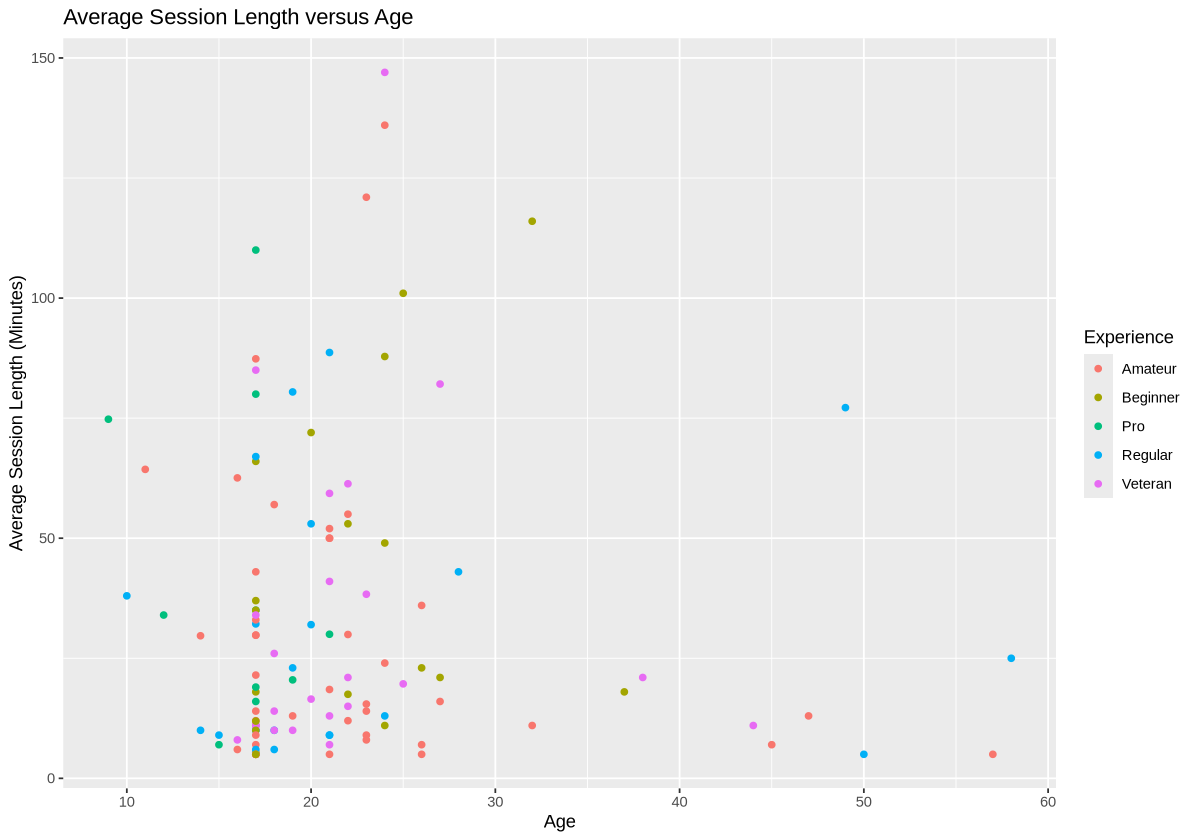

In [30]:
average_age_experience_plot <- combined_data |>
        ggplot(aes(x = Age, y = average_session_length, colour = experience)) +
        geom_point() +
        labs (x = "Age",
              y = "Average Session Length (Minutes)",
              colour = "Experience") +
        ggtitle("Average Session Length versus Age")
average_age_experience_plot  

There does not appear to be any strong relationship between experience and age or average session length. 

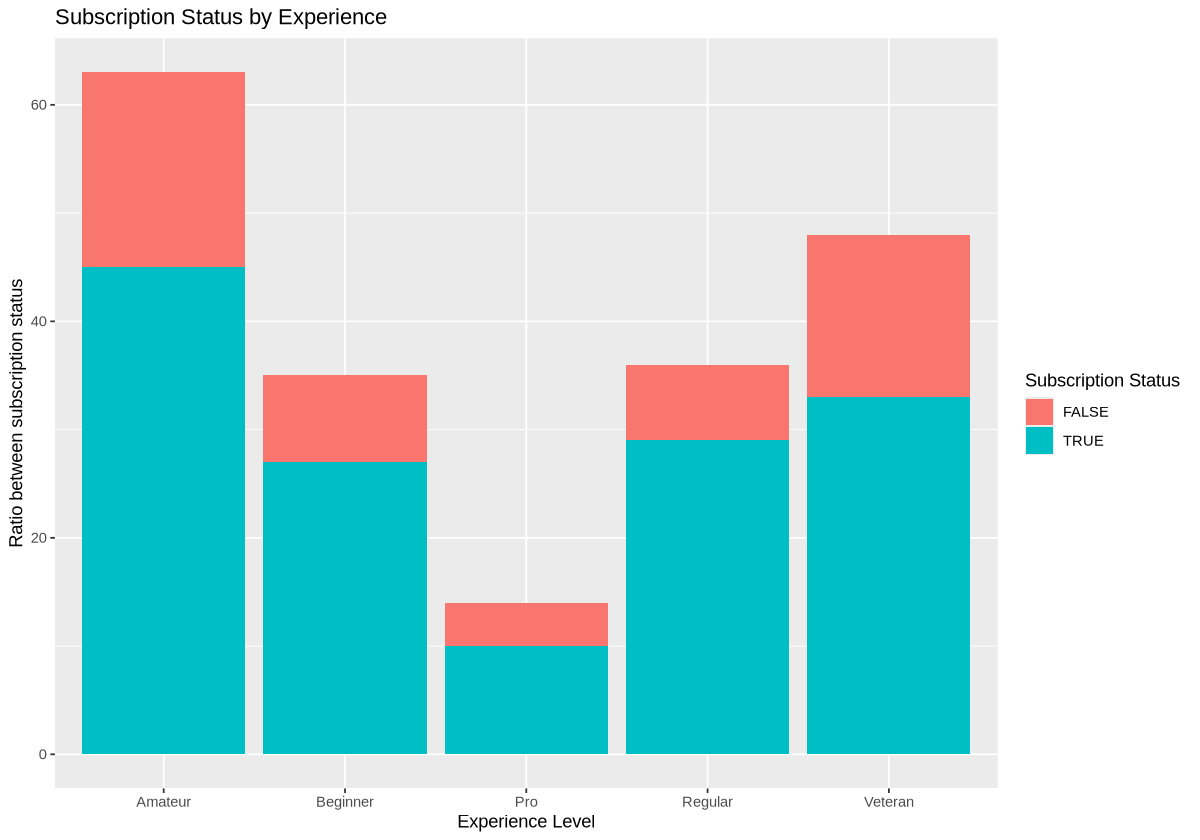

In [31]:
options(repr.plot.height = 7, repr.plot.width = 10)
experience_bar <- players_data |>
        ggplot(aes(x = experience)) +
        geom_bar(aes(fill = subscribe)) +
        ggtitle("Subscription Status by Experience") +
        labs(x = "Experience Level",
             y = "Ratio between subscription status",
             fill = "Subscription Status")
experience_bar

There are varying amounts of users of each experience level and that there are significantly more players subscribed to a newsletter than not.

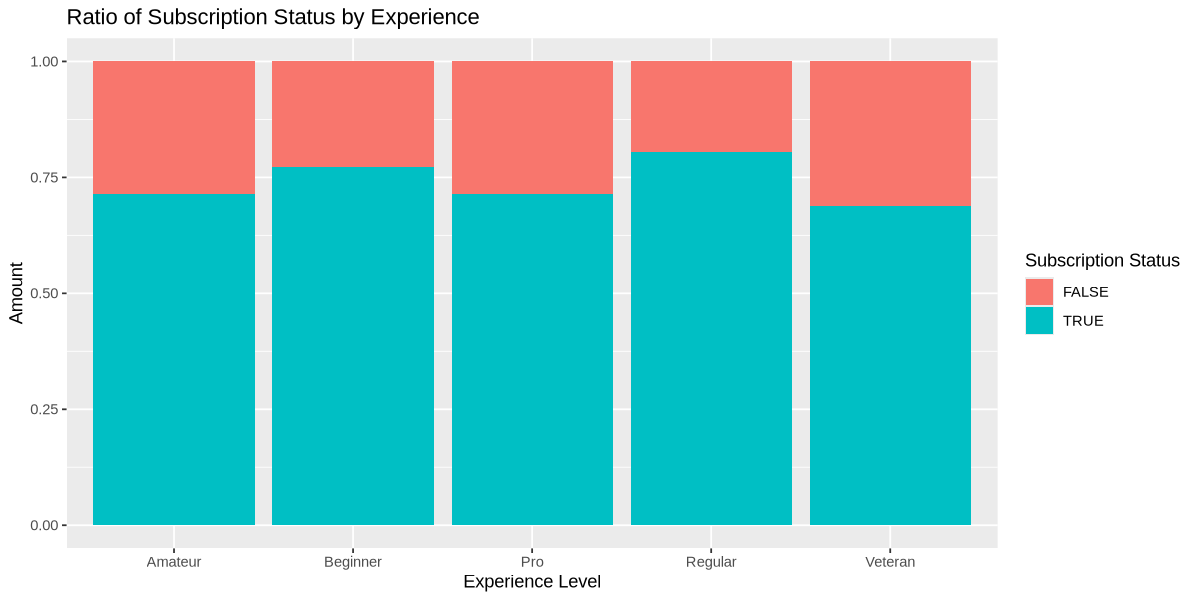

In [32]:
options(repr.plot.height = 5, repr.plot.width = 10)
experience_ratio <- players_data |>
        ggplot(aes(x = experience)) +
        geom_bar(aes(fill = subscribe), position = "fill") +
        ggtitle("Ratio of Subscription Status by Experience") +
        labs(x = "Experience Level",
             y = "Amount",
             fill = "Subscription Status")
experience_ratio

The ratio between subscription status varies slightly by experience level but there is no indication that increase in experience is related to a change in subscription ratio. 

## Question
#### Broad Question: 
Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
<br>
<br>
#### Specific Question:
Can hours played, age, and average session length predict whether a user is subscribed to a game-related newsletter? Additionally does this differ by experience?
<br> 
<br>
 By combining players.csv and sessions.csv, I can mutate the start and end time of each session and group_by `name` to determine the average session length for each player. 

### Methods and Plan

In order to answer my specific question with the given data, a k-nn classification model would be the most appropriate with `played_hours`, `Age`, and `average_session_length` as potential predictors and `subscribe` as the response variable. Out of the methods introduced in DSCI 100, classification is the only one that predicts a qualitative variable and therefore more fitting to predict subscription status than regression. 

K-NN classification does not make many assumptions about the distribution of the data. However, it does assume that data points close to each other belong to the same class. 

K-NN classification is biased with imbalanced data (ie significantly more of one class in the data set) and large numbers of predictors. It is also sensitive to the scaling of the predictors and potential outliers. To combat these weaknesses, it will be important to scale and center the predictors as well as consider balancing the data. 

To build my K-NN classification model, I will first convert `subscribe` to a factor. Then I will split the data into 80% training and 20% testing. Forward selection can be used to determine the optimal subset of the potential predictors and 5-fold cross-validation will be used to determine the ideal K value. Furthermore, I can test the accuracy of my model by utilizing the testing data. 

In order to assess how `experience` might impact the prediction of subscription status to a game-related newsletter, I can group the training data by `experience` then train different models that are tuned with 5-fold cross validation. From there, I can compare the cross validation accuracies. 

### GitHub link